# Machine Learning and Fintech HW8

### import module

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras
from keras import backend as K
from keras.datasets import mnist

### read data

In [4]:
np.random.seed(819)
# Read mnist data
# the data shuffled and splitted between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 1. Try to print out 0~9 so that knowing the things you are going to input in the model.

label: 0


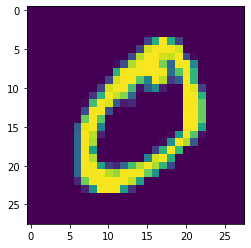

label: 1


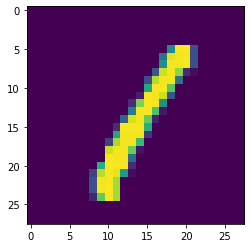

label: 2


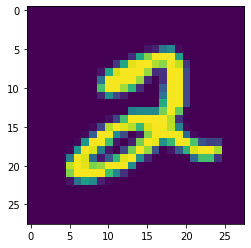

label: 3


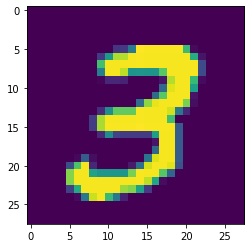

label: 4


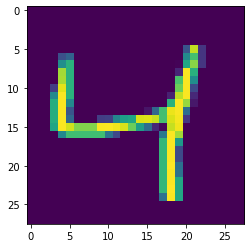

label: 5


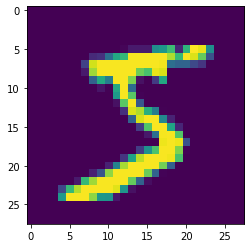

label: 6


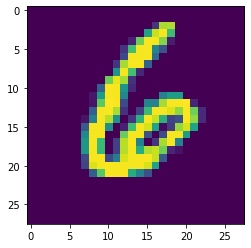

label: 7


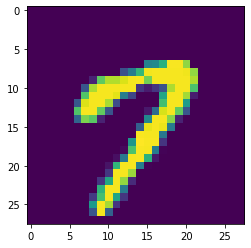

label: 8


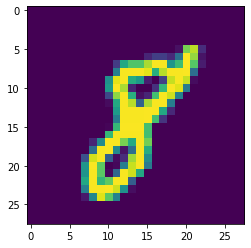

label: 9


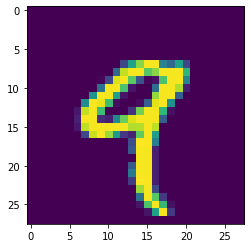

In [5]:
# Show the input image

# number_check = [False] * 10
# for i in range(100):
#     if number_check[y_train[i]] == False:
#         print('label:', y_train[i])
#         plt.imshow(x_train[i])
#         plt.show()
#         number_check[y_train[i]] = True
#     if number_check.count(True) == len(number_check):
#         break

for num in range(10):
    i = 0
    while y_train[i] != num:
        i += 1
    print('label:', y_train[i])
    plt.imshow(x_train[i])
    plt.show()

### Preprocess

#### reshape for CNN

In [6]:
x_train_reshape = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') 
x_test_reshape = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') 

#### standardize feature and label onehot-encoding 

In [7]:
# Standardize feature data  
x_train_std = x_train_reshape / 255  
x_test_std = x_test_reshape / 255  
  
# Label Onehot-encoding  
y_train_onehot = keras.utils.to_categorical(y_train)  
y_test_onehot = keras.utils.to_categorical(y_test) 

## 2. Using CNN for handwriting recognition. PLZ give the reason why you choose the specific Loss function, Optimizer, etc.

### build model

#### import module

In [8]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 

#### convolution and pooling

In [9]:
model = Sequential()  

# Create CN layer 1  
model.add(Conv2D(filters=16, kernel_size=(5, 5),  padding='same', input_shape=(28, 28, 1), activation='relu'))  

# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2, 2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2, 2)))  
  
# Add Dropout layer  
model.add(Dropout(0.25)) 

#### flatten

In [10]:
model.add(Flatten()) 

#### neural network

##### hidden layer

In [11]:
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5)) 

##### output layer

In [12]:
model.add(Dense(10, activation='softmax'))  

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

### training

In [14]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=x_train_std, y=y_train_onehot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)  

Epoch 1/10
160/160 - 3s - loss: 0.4971 - accuracy: 0.8431 - val_loss: 0.1012 - val_accuracy: 0.9690
Epoch 2/10
160/160 - 3s - loss: 0.1396 - accuracy: 0.9573 - val_loss: 0.0656 - val_accuracy: 0.9797
Epoch 3/10
160/160 - 3s - loss: 0.0984 - accuracy: 0.9712 - val_loss: 0.0516 - val_accuracy: 0.9839
Epoch 4/10
160/160 - 3s - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.0461 - val_accuracy: 0.9865
Epoch 5/10
160/160 - 3s - loss: 0.0690 - accuracy: 0.9788 - val_loss: 0.0401 - val_accuracy: 0.9872
Epoch 6/10
160/160 - 3s - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0394 - val_accuracy: 0.9884
Epoch 7/10
160/160 - 3s - loss: 0.0541 - accuracy: 0.9835 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 8/10
160/160 - 3s - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.0351 - val_accuracy: 0.9899
Epoch 9/10
160/160 - 3s - loss: 0.0428 - accuracy: 0.9867 - val_loss: 0.0327 - val_accuracy: 0.9908
Epoch 10/10
160/160 - 3s - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0345 - val_accuracy: 0.9894

* loss: 設定 Loss Function, 因為是multiple class，這邊選定 Cross Entropy 作為 Loss Function.
* optimizer: 設定訓練時的優化方法, 在深度學習使用 adam (Adam: A Method for Stochastic Optimization) 可以更快收斂, 並提高準確率.
* metrics: 設定評估模型的方式是 accuracy 準確率.

## 3. Try to print out some output to make sure it is right.

### result

#### import module

In [15]:
import os  
import matplotlib.pyplot as plt   

#### function definition

In [16]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

#### plot

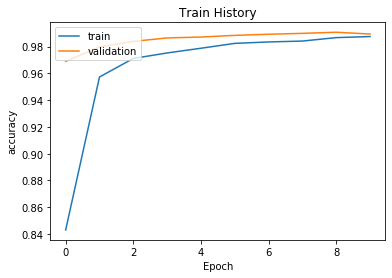

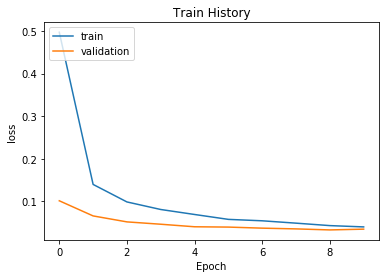

In [17]:
# print(train_history.history.keys())
show_train_history(train_history, 'accuracy', 'val_accuracy')  
show_train_history(train_history, 'loss', 'val_loss')  

### evaluation

In [18]:
loss, accuracy = model.evaluate(x_test_std, y_test_onehot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(accuracy * 100.0))  

313/313 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9907
	[Info] Accuracy of testing data = 99.1%


### test

In [19]:
print("[Info] Making prediction of x_test_std")  
# Making prediction and save result to prediction 
# prediction = model.predict_classes(x_test_std) 
prediction = np.argmax(model.predict(x_test_std), axis=-1) 
print("[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250])) 

[Info] Making prediction of x_test_std
[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 2 4 2]



#### function definition

In [20]:
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2, 2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
    
def plot_images_labels_predict(images, labels, prediction, idx, num=16):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    num = np.clip(num, a_min=num, a_max=25)
    for i in range(0, num):  
        ax = plt.subplot(4, 4, 1 + i)  
        ax.imshow(images[idx], cmap='gray')  
        title = "label = " + str(labels[idx])  
        if len(prediction) > 0:  
            title = "label = {}, prediction = {}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "label = {}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([])
        ax.set_yticks([])  
        idx += 1  
    plt.show()  

def plot_img(n):
    plt.imshow(x_test[n], cmap='gray')
    plt.show()

def one_img_predict(n):
    predict = model.predict_classes(x_test)
    print('Prediction:', prediction[n])
    print('Answer:', y_test[n])
    plot_img(n)

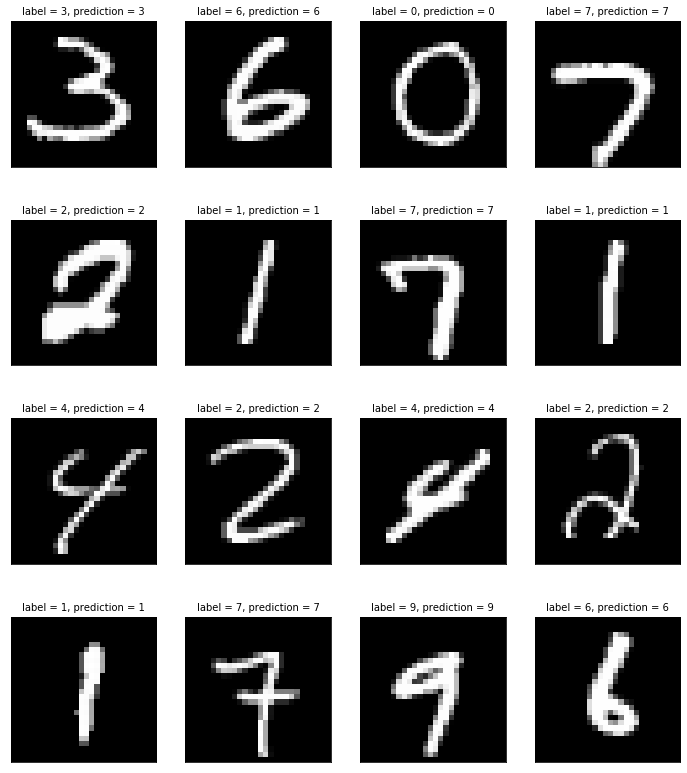

In [21]:
plot_images_labels_predict(x_test, y_test, prediction, idx=819)  

## 4. Use ROC, recall… to see the model performance.

### Confusion Matrix

In [22]:
print("\t[Info] Display Confusion Matrix:")  
print("%s\n" % pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])) 

	[Info] Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        978     0     0     0    0    0    0     1    1    0
1          0  1131     2     0    0    0    0     1    1    0
2          3     0  1025     0    0    0    0     3    1    0
3          0     0     4  1003    0    1    0     1    1    0
4          0     0     2     0  974    0    0     1    3    2
5          1     0     0     5    0  881    3     1    0    1
6          7     2     1     0    1    1  945     0    1    0
7          0     2     7     2    0    0    0  1015    1    1
8          4     0     1     1    0    1    0     2  963    2
9          0     3     0     1    3    1    0     8    1  992



### accuracy and loss

In [23]:
loss, accuracy = model.evaluate(x_test_std, y_test_onehot)  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(accuracy * 100.0))  
print("\t[Info] Loss of testing data = {:f}".format(loss))  

313/313 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9907
	[Info] Accuracy of testing data = 99.1%
	[Info] Loss of testing data = 0.026046


### performance score

#### import module

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
print('accuracy score:', accuracy_score(y_test, prediction))
print('precision score:', precision_score(y_test, prediction, average='weighted'))
print('recall score:', recall_score(y_test, prediction, average='weighted'))
print('f1 score:', f1_score(y_test, prediction, average='weighted'))

accuracy score: 0.9907
precision score: 0.9907326833619665
recall score: 0.9907
f1 score: 0.9907014456382475


### ROC

#### import module

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from itertools import cycle
from sklearn.metrics import auc
from scipy import interp

In [27]:
n_classes = y_test_onehot.shape[-1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], model.predict(x_test_std)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print('roc_auc')
print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), model.predict(x_test_std).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

roc_auc
{0: 0.9999812208697226, 1: 0.9999862847261045, 2: 0.9999538626572344, 3: 0.999965858654831, 4: 0.9999827229451483, 5: 0.9999532269467929, 6: 0.9999051053330803, 7: 0.9999296340885869, 8: 0.9999389170504921, 9: 0.9999562385863454}


D:\programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


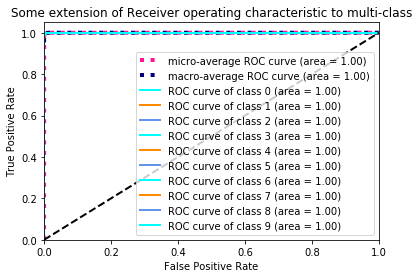

In [28]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()